In [4]:
import numpy as np
import math as m
import pandas as pd

In [18]:
import math

angle = 180
cosine = math.cos(math.radians(angle))
print(cosine)

-1.0


In [19]:
 math.cos(math.radians(180))

-1.0

the overall algorithm of PCA can be summarised in the following way:

The original data points may not be uncorrelated to each other  and hence one of the ways to tackle this problem is to drop the least significant column.
The other way is to generate the new features, the PCs which are uncorrelated to each other. 
Hence, you first calculate the covariance matrix of the original data points and try to diagonalise it which means that they should have near to zero covariance.
The diagonalization of the covariance matrix happens when you represent all the original data points in the eigenvector basis. 
The eigenvalues along the diagonal will be of the covariance matrix of the original data points.

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris

In [48]:
iris=load_iris()
#pd.DataFrame(load_iris())

In [49]:
x=iris.data
iris.feature_names
y = iris.target
iris2=pd.DataFrame(x,columns=iris.feature_names)

In [42]:
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [52]:
x_centered=x-x.mean(axis=0)

In [55]:
x_scale=x_centered/x_centered.std(axis=0)

In [61]:
x_scale

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [57]:
from sklearn.preprocessing import StandardScaler    ## this way automatically standardise your data

In [58]:
scaler=StandardScaler()

In [59]:
x_scale_auto=scaler.fit_transform(x)

In [60]:
x_scale_auto

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [62]:
np.cov?

In [74]:
cov=np.cov(x_scale_auto.T)

In [75]:
cov=pd.DataFrame(cov,index=iris.feature_names,columns=iris.feature_names)

In [76]:
cov

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.006711,-0.118359,0.877604,0.823431
sepal width (cm),-0.118359,1.006711,-0.431316,-0.368583
petal length (cm),0.877604,-0.431316,1.006711,0.969328
petal width (cm),0.823431,-0.368583,0.969328,1.006711


<Axes: >

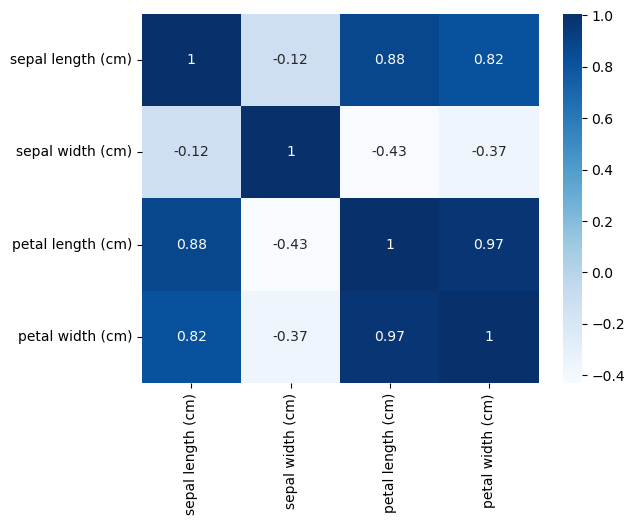

In [80]:
sns.heatmap(cov,annot=True,cmap=plt.cm.Blues)

In [85]:
np.linalg.eig?

In [87]:
w,v=np.linalg.eig(cov)   # w is eigen values, v is eigen vectors

In [88]:
w

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [89]:
np.sort(w)

array([0.02085386, 0.14774182, 0.9201649 , 2.93808505])

In [90]:
v

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [91]:
ix = np.argsort(w)[::-1]
v_sorted = v[:, ix]
v_sorted

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

In [108]:
eg=[1,6,7,8,0,5,32]
np.argsort(eg)[::-1]

array([6, 3, 2, 1, 5, 0, 4], dtype=int64)

## Automatic PCA

In [109]:
pca=PCA()

In [143]:
x_lr=pca.fit_transform(x)

In [144]:
x_lr

array([[-2.68412563e+00,  3.19397247e-01, -2.79148276e-02,
        -2.26243707e-03],
       [-2.71414169e+00, -1.77001225e-01, -2.10464272e-01,
        -9.90265503e-02],
       [-2.88899057e+00, -1.44949426e-01,  1.79002563e-02,
        -1.99683897e-02],
       [-2.74534286e+00, -3.18298979e-01,  3.15593736e-02,
         7.55758166e-02],
       [-2.72871654e+00,  3.26754513e-01,  9.00792406e-02,
         6.12585926e-02],
       [-2.28085963e+00,  7.41330449e-01,  1.68677658e-01,
         2.42008576e-02],
       [-2.82053775e+00, -8.94613845e-02,  2.57892158e-01,
         4.81431065e-02],
       [-2.62614497e+00,  1.63384960e-01, -2.18793179e-02,
         4.52978706e-02],
       [-2.88638273e+00, -5.78311754e-01,  2.07595703e-02,
         2.67447358e-02],
       [-2.67275580e+00, -1.13774246e-01, -1.97632725e-01,
         5.62954013e-02],
       [-2.50694709e+00,  6.45068899e-01, -7.53180094e-02,
         1.50199245e-02],
       [-2.61275523e+00,  1.47299392e-02,  1.02150260e-01,
      

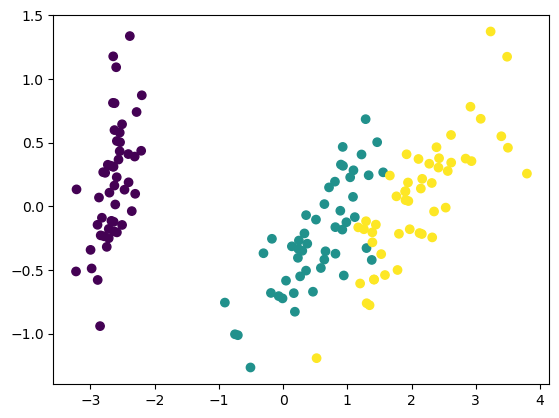

In [117]:
plt.scatter(x_lr[:,0],x_lr[:,1],c=y)

## Variance of each component - Scree Plots

In [122]:
pca.explained_variance_

array([4.22824171, 0.24267075, 0.0782095 , 0.02383509])

Text(0, 0.5, 'Variance')

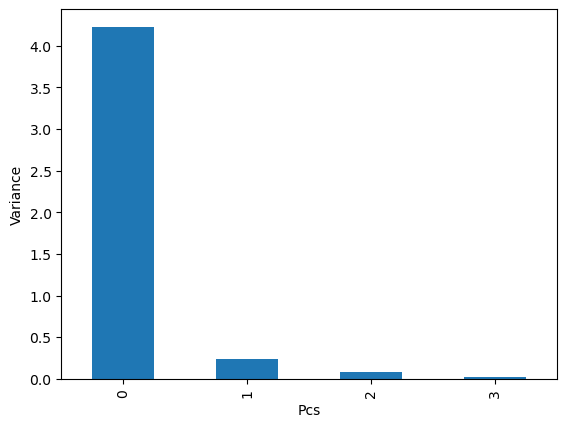

In [127]:
pd.Series(pca.explained_variance_).plot(kind='bar')
plt.xlabel('Pcs')
plt.ylabel('Variance')

Text(0, 0.5, 'Ratio of Variance')

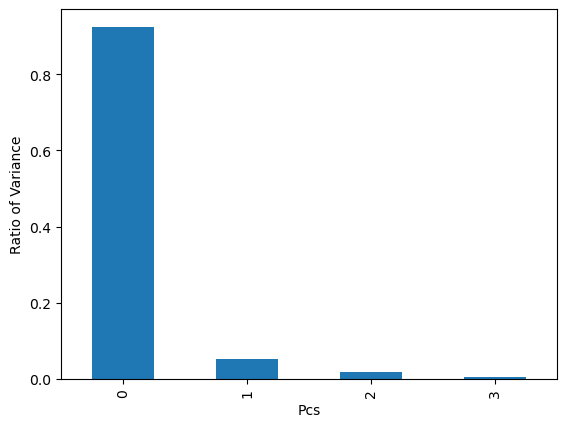

In [135]:
pd.Series(pca.explained_variance_ratio_).plot(kind='bar')
plt.xlabel('Pcs')
plt.ylabel('Ratio of Variance')

Text(0, 0.5, 'Cumulative Variance Ratio')

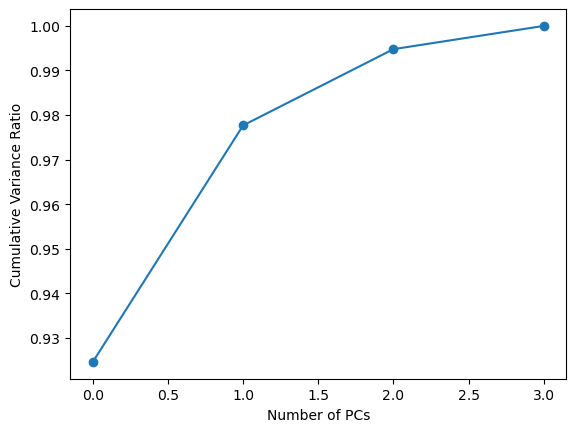

In [136]:
plt.plot(np.cumsum(pca.explained_variance_ratio_), '-o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Ratio')

### Bigplot

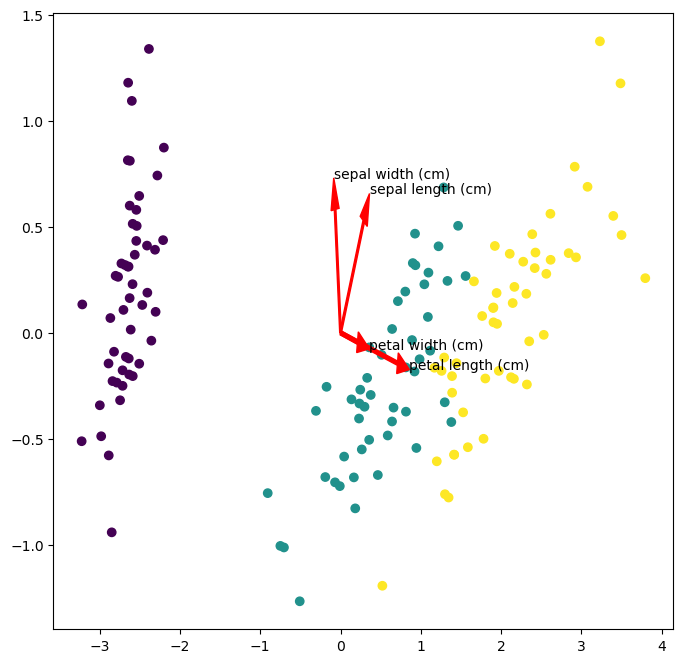

In [137]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(x_lr[:, 0], x_lr[:, 1], c=y)
components = pca.components_
sv = pca.singular_values_
for i, feat in enumerate(iris.feature_names):
    xx, yy = components[:2, i] # * sv[i]
    ax.arrow(0, 0, xx, yy, color='r', width=0.02 ,length_includes_head=True, head_width=0.1)
    ax.text(xx, yy, feat)

Try PCA on the Breast Cancer dataset (given below):
1. Find the number of PCs required to get > 99% variance
2. Plot the top 2 PCs

In [7]:
from sklearn.datasets import load_breast_cancer
bc = load_breast_cancer()
X = bc.data
y = bc.target
df = pd.DataFrame(X, columns=bc.feature_names)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


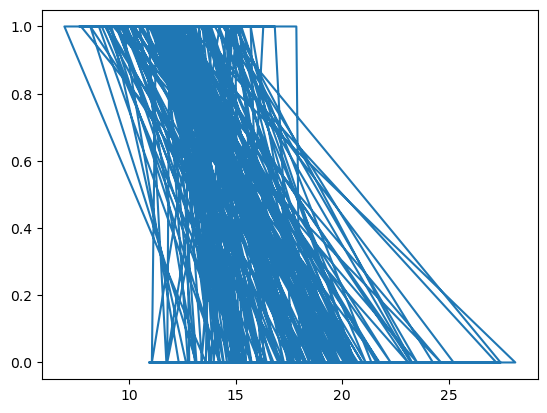

In [17]:
plt.plot(df['mean radius'],y)
              

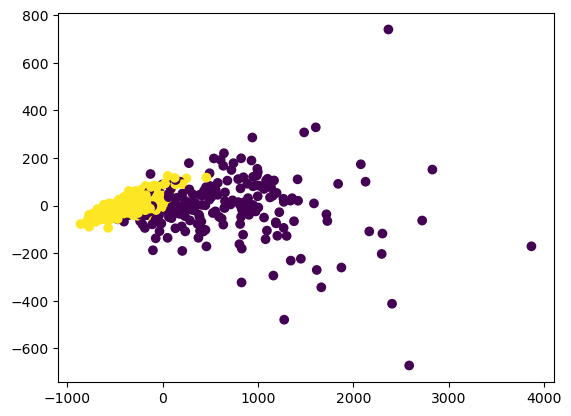

In [146]:
pca=PCA()
X_bc=pca.fit_transform(X)
plt.scatter(X_bc[:,0],X_bc[:,1],c=y)

<Axes: >

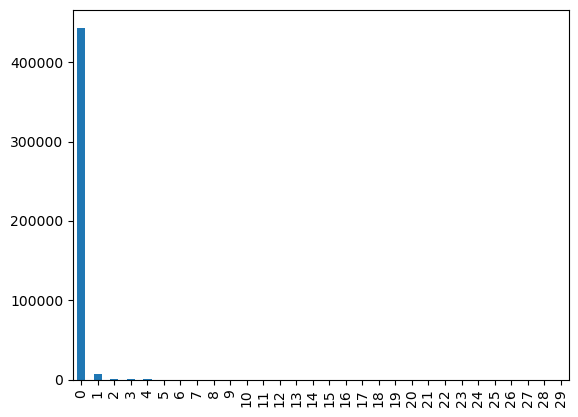

In [147]:
pd.Series(pca.explained_variance_).plot(kind='bar')

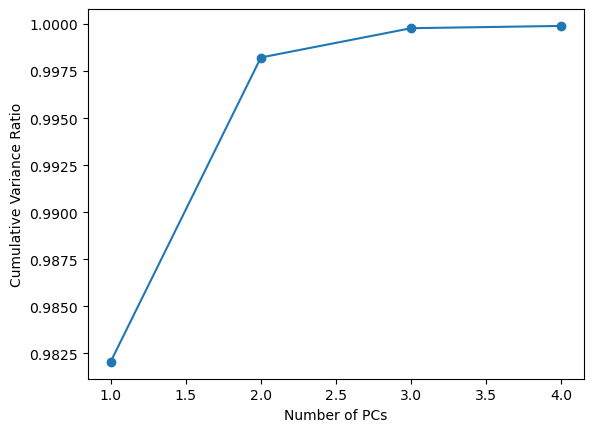

In [152]:
n_components = 4  # Specify the desired number of top PCs

# Calculate the cumulative variance ratio for the specified number of top PCs
cumulative_variance = np.cumsum(pca.explained_variance_ratio_[:n_components])

# Plot the cumulative variance ratio for the specified number of top PCs
plt.plot(range(1, n_components + 1), cumulative_variance, '-o')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance Ratio')
plt.show()
